<a href="https://colab.research.google.com/github/XiaoLiang28/Xiao/blob/main/ps6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

aok:

good progress but need way more

see others works

need preamble with reseearch questions and hypotheses

need way more graphs

In [29]:
#---------------------------SETUP----------------------------------
#get useful libraries
import time, os, sys, re #basics
import zipfile, json, datetime, string   #string for annotating points in scatter 
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt #import pylab as plt #apparently discouraged now: 
 #https://stackoverflow.com/questions/11469336/what-is-the-difference-between-pylab-and-pyplot
 #https://www.tutorialspoint.com/matplotlib/matplotlib_pylab_module.htm

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
#s4 = Styler(df4, uuid_len=0, cell_ids=False)

import urllib  #weird, guess need to have os and pandas imported for this to work  %TODO/LATER ditch it, its weird anyway, just use wget/curl                                                 

from google.colab import files

#import webbrowser                                                                                                           

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter() #this enables spreadsheet view upon calling dataframe (without() )

#many tricks how to extend notebook functionality
#https://coderzcolumn.com/tutorials/python/list-of-useful-magic-commands-in-jupyter-notebook-lab
#will display all output not just last command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#MAGICS and THEMES/STYLES: important! does affect not just shading/colors, but also fonts, spacing, etc
#(even if you only select default (v not selecting anything) [but does seem to work better if you do make explicit sleections]) 

###magics: https://ipython.readthedocs.io/en/stable/interactive/magics.html
#most essential setup for vis: it does affect vis! careful!! stick with inline, maybe notebook; others mostly for non-notebook, eg spyder environ
#https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html recomends *inline*!
#show current one:
#%matplotlib 
#%matplotlib --list 
#interactive plots:
#%matplotlib notebook  
#static images of your plot:
%matplotlib inline 
#may play with this one and other magics (btw default is probably agg)
#%matplotlib nbagg

###themes/styles: https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html
#https://jakevdp.github.io/PythonDataScienceHandbook/04.11-settings-and-stylesheets.html
#https://matplotlib.org/stable/tutorials/introductory/customizing.html
#here more about art and style than under the hood functionality as with magics, explore and experiment
#many may find 'default' or seaborn ones more pleasing; my fav 'classic' is back from 90s ;) 
#plt.style.available #list available styles :) may install more
#plt.style.use('default') # more delicate subtle than classic
plt.style.use('classic')  #  'seaborn-whitegrid' 'seaborn-white' 'seaborn-poster'
# btw: magics v theme/style sequence matters, eg if i specify classic style before inline magic, i wouldnt get grey bounding box im getting

In [30]:
gd=pd.read_excel("https://github.com/XiaoLiang28/Xiao/blob/main/Gender%20Development%20Index.xlsx?raw=true")

In [31]:
gd

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,SDG4.4,NaN,NaN,NaN,SDG8.5,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,Gender Development Index,NaN,NaN,NaN,Human Development Index,NaN,NaN,NaN,...,NaN,NaN,NaN,Mean years of schooling,NaN,NaN,NaN,Estimated gross national income per capita,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,Value,NaN,NaN,NaN,...,NaN,NaN,NaN,(years),NaN,NaN,NaN,(2017 PPP $),NaN,NaN
4,HDI rank,Country,Value,NaN,Group,NaN,Female,NaN,Male,NaN,...,NaN,Male,NaN,Female,NaN,Male,NaN,Female,NaN,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,...,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,...,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,...,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,...,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [32]:
gd=gd[6:197]

In [33]:
gd

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
6,1,Switzerland,0.967,NaN,2,NaN,0.943709,NaN,0.975611,NaN,...,NaN,16.593439,NaN,13.48301,NaN,14.24829,NaN,54596.873938,NaN,79450.51016
7,2,Norway,0.983,NaN,1,NaN,0.9499,NaN,0.966061,NaN,...,NaN,17.52533,NaN,13.13508,NaN,12.87032,NaN,54699.445557,NaN,74444.990916
8,3,Iceland,0.976,NaN,1,NaN,0.946936,NaN,0.970604,NaN,...,NaN,18.090469,NaN,13.86953,NaN,13.67178,NaN,47135.914239,NaN,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,NaN,1,NaN,0.941078,NaN,0.964311,NaN,...,NaN,17.033239,NaN,11.8457,NaN,12.70688,NaN,51735.256517,NaN,75306.957306
10,5,Australia,0.968,NaN,2,NaN,0.931672,NaN,0.962956,NaN,...,NaN,20.30188,NaN,12.81059,NaN,12.63971,NaN,37485.5883,NaN,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,...,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,...,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,...,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,...,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [34]:
gd1 = gd.copy()

In [35]:
gd1

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
6,1,Switzerland,0.967,NaN,2,NaN,0.943709,NaN,0.975611,NaN,...,NaN,16.593439,NaN,13.48301,NaN,14.24829,NaN,54596.873938,NaN,79450.51016
7,2,Norway,0.983,NaN,1,NaN,0.9499,NaN,0.966061,NaN,...,NaN,17.52533,NaN,13.13508,NaN,12.87032,NaN,54699.445557,NaN,74444.990916
8,3,Iceland,0.976,NaN,1,NaN,0.946936,NaN,0.970604,NaN,...,NaN,18.090469,NaN,13.86953,NaN,13.67178,NaN,47135.914239,NaN,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,NaN,1,NaN,0.941078,NaN,0.964311,NaN,...,NaN,17.033239,NaN,11.8457,NaN,12.70688,NaN,51735.256517,NaN,75306.957306
10,5,Australia,0.968,NaN,2,NaN,0.931672,NaN,0.962956,NaN,...,NaN,20.30188,NaN,12.81059,NaN,12.63971,NaN,37485.5883,NaN,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,...,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,...,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,...,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,...,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [36]:
gd1.rename(columns={'Unnamed: 0':'rank'},inplace=True)
gd1.rename(columns={'Unnamed: 1':'country'},inplace=True)

In [37]:
gd1 #question: why only one name be changed with the same code? 
#aok to make sure you got the exact correct name best to copy paste; here it is 'Unnamed: 0' --there is a space!

,rank,country,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
6,1,Switzerland,0.967,NaN,2,NaN,0.943709,NaN,0.975611,NaN,...,NaN,16.593439,NaN,13.48301,NaN,14.24829,NaN,54596.873938,NaN,79450.51016
7,2,Norway,0.983,NaN,1,NaN,0.9499,NaN,0.966061,NaN,...,NaN,17.52533,NaN,13.13508,NaN,12.87032,NaN,54699.445557,NaN,74444.990916
8,3,Iceland,0.976,NaN,1,NaN,0.946936,NaN,0.970604,NaN,...,NaN,18.090469,NaN,13.86953,NaN,13.67178,NaN,47135.914239,NaN,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,NaN,1,NaN,0.941078,NaN,0.964311,NaN,...,NaN,17.033239,NaN,11.8457,NaN,12.70688,NaN,51735.256517,NaN,75306.957306
10,5,Australia,0.968,NaN,2,NaN,0.931672,NaN,0.962956,NaN,...,NaN,20.30188,NaN,12.81059,NaN,12.63971,NaN,37485.5883,NaN,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,...,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,...,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,...,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,...,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [38]:
gd1.rename(columns={'Unnamed: 2':'Gender Development Index'},inplace=True)
gd1.rename(columns={'Unnamed: 6':'HDI Female'},inplace=True)
gd1.rename(columns={'Unnamed: 8':'HDI Male'},inplace=True)
gd1.rename(columns={'Unnamed: 10':'Life expectancy at birth female'},inplace=True)
gd1.rename(columns={'Unnamed: 12':'Life expectancy at birth male'},inplace=True)
gd1.rename(columns={'Unnamed: 14':'Expected years of schooling female'},inplace=True)
gd1.rename(columns={'Unnamed: 16':'Expected years of schooling male'},inplace=True)
gd1.rename(columns={'Unnamed: 18':'Mean years of schooling female'},inplace=True)
gd1.rename(columns={'Unnamed: 20':'Mean years of schooling male'},inplace=True)
gd1.rename(columns={'Unnamed: 22':'GNI female'},inplace=True)
gd1.rename(columns={'Unnamed: 24':'GNI male'},inplace=True)

In [39]:
gd1.columns

Index(['rank', 'country', 'Gender Development Index', 'Unnamed: 3',
       'Unnamed: 4', 'Unnamed: 5', 'HDI Female', 'Unnamed: 7', 'HDI Male',
       'Unnamed: 9', 'Life expectancy at birth female', 'Unnamed: 11',
       'Life expectancy at birth male', 'Unnamed: 13',
       'Expected years of schooling female', 'Unnamed: 15',
       'Expected years of schooling male', 'Unnamed: 17',
       'Mean years of schooling female', 'Unnamed: 19',
       'Mean years of schooling male', 'Unnamed: 21', 'GNI female',
       'Unnamed: 23', 'GNI male'],
      dtype='object')

In [40]:
gd1

,rank,country,Gender Development Index,Unnamed: 3,Unnamed: 4,Unnamed: 5,HDI Female,Unnamed: 7,HDI Male,Unnamed: 9,...,Unnamed: 15,Expected years of schooling male,Unnamed: 17,Mean years of schooling female,Unnamed: 19,Mean years of schooling male,Unnamed: 21,GNI female,Unnamed: 23,GNI male
6,1,Switzerland,0.967,NaN,2,NaN,0.943709,NaN,0.975611,NaN,...,NaN,16.593439,NaN,13.48301,NaN,14.24829,NaN,54596.873938,NaN,79450.51016
7,2,Norway,0.983,NaN,1,NaN,0.9499,NaN,0.966061,NaN,...,NaN,17.52533,NaN,13.13508,NaN,12.87032,NaN,54699.445557,NaN,74444.990916
8,3,Iceland,0.976,NaN,1,NaN,0.946936,NaN,0.970604,NaN,...,NaN,18.090469,NaN,13.86953,NaN,13.67178,NaN,47135.914239,NaN,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,NaN,1,NaN,0.941078,NaN,0.964311,NaN,...,NaN,17.033239,NaN,11.8457,NaN,12.70688,NaN,51735.256517,NaN,75306.957306
10,5,Australia,0.968,NaN,2,NaN,0.931672,NaN,0.962956,NaN,...,NaN,20.30188,NaN,12.81059,NaN,12.63971,NaN,37485.5883,NaN,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,...,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,...,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,...,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,...,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [41]:
pd.set_option('display.max_columns', None)

In [42]:
gd1

,rank,country,Gender Development Index,Unnamed: 3,Unnamed: 4,Unnamed: 5,HDI Female,Unnamed: 7,HDI Male,Unnamed: 9,Life expectancy at birth female,Unnamed: 11,Life expectancy at birth male,Unnamed: 13,Expected years of schooling female,Unnamed: 15,Expected years of schooling male,Unnamed: 17,Mean years of schooling female,Unnamed: 19,Mean years of schooling male,Unnamed: 21,GNI female,Unnamed: 23,GNI male
6,1,Switzerland,0.967,NaN,2,NaN,0.943709,NaN,0.975611,NaN,85.8959,NaN,81.9952,NaN,16.40519,NaN,16.593439,NaN,13.48301,NaN,14.24829,NaN,54596.873938,NaN,79450.51016
7,2,Norway,0.983,NaN,1,NaN,0.9499,NaN,0.966061,NaN,84.8787,NaN,81.5622,NaN,18.886789,NaN,17.52533,NaN,13.13508,NaN,12.87032,NaN,54699.445557,NaN,74444.990916
8,3,Iceland,0.976,NaN,1,NaN,0.946936,NaN,0.970604,NaN,84.1804,NaN,81.2138,NaN,20.27153,NaN,18.090469,NaN,13.86953,NaN,13.67178,NaN,47135.914239,NaN,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,NaN,1,NaN,0.941078,NaN,0.964311,NaN,88.3257,NaN,82.6613,NaN,17.572201,NaN,17.033239,NaN,11.8457,NaN,12.70688,NaN,51735.256517,NaN,75306.957306
10,5,Australia,0.968,NaN,2,NaN,0.931672,NaN,0.962956,NaN,85.8396,NaN,83.1718,NaN,21.817579,NaN,20.30188,NaN,12.81059,NaN,12.63971,NaN,37485.5883,NaN,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,NaN,3,NaN,0.412236,NaN,0.440935,NaN,63.6092,NaN,59.7112,NaN,10.915472,NaN,10.535239,NaN,2.491789,NaN,3.851801,NaN,667.520768,NaN,796.956456
193,188,Central African Republic,0.81,NaN,5,NaN,0.359111,NaN,0.443254,NaN,56.3035,NaN,51.6455,NaN,6.66856,NaN,9.393839,NaN,3.108,NaN,5.594,NaN,769.842841,NaN,1162.317208
194,189,Niger,0.835,NaN,5,NaN,0.364315,NaN,0.436371,NaN,62.7943,NaN,60.4065,NaN,6.260139,NaN,7.638221,NaN,1.708292,NaN,2.789488,NaN,936.484843,NaN,1534.591089
195,190,Chad,0.77,NaN,5,NaN,0.339312,NaN,0.440889,NaN,54.2828,NaN,50.8449,NaN,6.611644,NaN,9.464517,NaN,1.489174,NaN,3.681625,NaN,965.151078,NaN,1760.0728


In [43]:
gd2 = gd1.drop(['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9', 'Unnamed: 11', 'Unnamed: 13', 'Unnamed: 15', 'Unnamed: 17', 'Unnamed: 19', 'Unnamed: 21', 'Unnamed: 23'], axis=1)

In [44]:
gd2

,rank,country,Gender Development Index,HDI Female,HDI Male,Life expectancy at birth female,Life expectancy at birth male,Expected years of schooling female,Expected years of schooling male,Mean years of schooling female,Mean years of schooling male,GNI female,GNI male
6,1,Switzerland,0.967,0.943709,0.975611,85.8959,81.9952,16.40519,16.593439,13.48301,14.24829,54596.873938,79450.51016
7,2,Norway,0.983,0.9499,0.966061,84.8787,81.5622,18.886789,17.52533,13.13508,12.87032,54699.445557,74444.990916
8,3,Iceland,0.976,0.946936,0.970604,84.1804,81.2138,20.27153,18.090469,13.86953,13.67178,47135.914239,64004.128579
9,4,"Hong Kong, China (SAR)",0.976,0.941078,0.964311,88.3257,82.6613,17.572201,17.033239,11.8457,12.70688,51735.256517,75306.957306
10,5,Australia,0.968,0.931672,0.962956,85.8396,83.1718,21.817579,20.30188,12.81059,12.63971,37485.5883,61160.790107
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,187,Burundi,0.935,0.412236,0.440935,63.6092,59.7112,10.915472,10.535239,2.491789,3.851801,667.520768,796.956456
193,188,Central African Republic,0.81,0.359111,0.443254,56.3035,51.6455,6.66856,9.393839,3.108,5.594,769.842841,1162.317208
194,189,Niger,0.835,0.364315,0.436371,62.7943,60.4065,6.260139,7.638221,1.708292,2.789488,936.484843,1534.591089
195,190,Chad,0.77,0.339312,0.440889,54.2828,50.8449,6.611644,9.464517,1.489174,3.681625,965.151078,1760.0728


In [45]:
#aok now works
#from plotly.offline import init_notebook_mode, iplot
#init_notebook_mode(connected = True)
import plotly.graph_objs as go

In [60]:
trace1 = go.Box(
    y=gd2["Life expectancy at birth female"],
    name = "Life Expectancy at Birth (Female)"
)
trace2 = go.Box(
    y=gd2["Life expectancy at birth male"],
    name = "Life Expectancy at Birth (Male)"
)
fig = go.Figure( data = [trace1, trace2], layout = dict(title = "Life Expectancy According To Years"))
#iplot(fig) #I found this code online, but I don't know why it cannot show the vis in my colab
fig.show() #aok now works

In [58]:
gd2.columns

Index(['rank', 'country', 'Gender Development Index', 'HDI Female', 'HDI Male',
       'Life expectancy at birth female', 'Life expectancy at birth male',
       'Expected years of schooling female',
       'Expected years of schooling male', 'Mean years of schooling female',
       'Mean years of schooling male', 'GNI female', 'GNI male'],
      dtype='object')

In [62]:
gd2 = gd2.rename(columns={'HDI Female': 'HDI female'})
gd2 = gd2.rename(columns={'HDI Male': 'HDI male'})

In [63]:
trace1 = go.Box(
    y=gd2["HDI female"],
    name = "HDI Female"
)
trace2 = go.Box(
    y=gd2["HDI male"],
    name = "HDI Male"
)
fig = go.Figure( data = [trace1, trace2], layout = dict(title = "Estimated Gross National Income per Capita"))
#iplot(fig) #I found this code online, but I don't know why it cannot show the vis in my colab
fig.show() #aok now works

KeyError: ignored

In [61]:
trace1 = go.Box(
    y=gd2["GNI female"],
    name = "Female"
)
trace2 = go.Box(
    y=gd2["GNI male"],
    name = "Male"
)
fig = go.Figure( data = [trace1, trace2], layout = dict(title = "Estimated Gross National Income per Capita"))
iplot(fig)

KeyError: ignored

In [3]:
hd=pd.read_excel("https://github.com/XiaoLiang28/Xiao/blob/main/Human%20Development%20Index.xlsx?raw=true")

In [4]:
hd

,HDI Rank,Country,Human Development Index (HDI),Unnamed: 3,Life expectancy at birth,Unnamed: 5,Expected years of schooling,Unnamed: 7,Mean years of schooling,Unnamed: 9,Gross national income (GNI) per capita
0,1,Switzerland,0.962,NaN,83.9872,NaN,16.500299,NaN,13.859660,NaN,66933.004540
1,2,Norway,0.961,NaN,83.2339,NaN,18.185200,NaN,13.003630,NaN,64660.106220
2,3,Iceland,0.959,NaN,82.6782,NaN,19.163059,NaN,13.767170,NaN,55782.049810
3,4,"Hong Kong, China (SAR)",0.952,NaN,85.4734,NaN,17.278170,NaN,12.226210,NaN,62606.845400
4,5,Australia,0.951,NaN,84.5265,NaN,21.054590,NaN,12.726820,NaN,49238.433350
...,...,...,...,...,...,...,...,...,...,...,...
186,187,Burundi,0.426,NaN,61.6627,NaN,10.722722,NaN,3.129267,NaN,731.786709
187,188,Central African Republic,0.404,NaN,53.8947,NaN,8.040172,NaN,4.334000,NaN,966.058611
188,189,Niger,0.400,NaN,61.5763,NaN,6.957112,NaN,2.116717,NaN,1239.866936
189,190,Chad,0.394,NaN,52.5254,NaN,8.035914,NaN,2.573774,NaN,1364.169417


In [5]:
hd.drop(['Unnamed: 3', 'Unnamed: 5', 'Unnamed: 7', 'Unnamed: 9'],axis=1, inplace=True)

In [6]:
hd

,HDI Rank,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
0,1,Switzerland,0.962,83.9872,16.500299,13.859660,66933.004540
1,2,Norway,0.961,83.2339,18.185200,13.003630,64660.106220
2,3,Iceland,0.959,82.6782,19.163059,13.767170,55782.049810
3,4,"Hong Kong, China (SAR)",0.952,85.4734,17.278170,12.226210,62606.845400
4,5,Australia,0.951,84.5265,21.054590,12.726820,49238.433350
...,...,...,...,...,...,...,...
186,187,Burundi,0.426,61.6627,10.722722,3.129267,731.786709
187,188,Central African Republic,0.404,53.8947,8.040172,4.334000,966.058611
188,189,Niger,0.400,61.5763,6.957112,2.116717,1239.866936
189,190,Chad,0.394,52.5254,8.035914,2.573774,1364.169417


In [55]:
hd.columns

Index(['HDI Rank', 'Country', 'Human Development Index (HDI)',
       'Life expectancy at birth', 'Expected years of schooling',
       'Mean years of schooling', 'Gross national income (GNI) per capita'],
      dtype='object')

In [64]:
hd = hd.rename(columns={'Human Development Index (HDI)': 'HDI'})

<Axes: xlabel='Life expectancy at birth', ylabel='HDI'>

Text(0.5, 0, 'Life expectancy at birth')

Text(0, 0.5, 'HDI')

Text(0.5, 1.0, 'Life Expectancy and HDI Correlation')

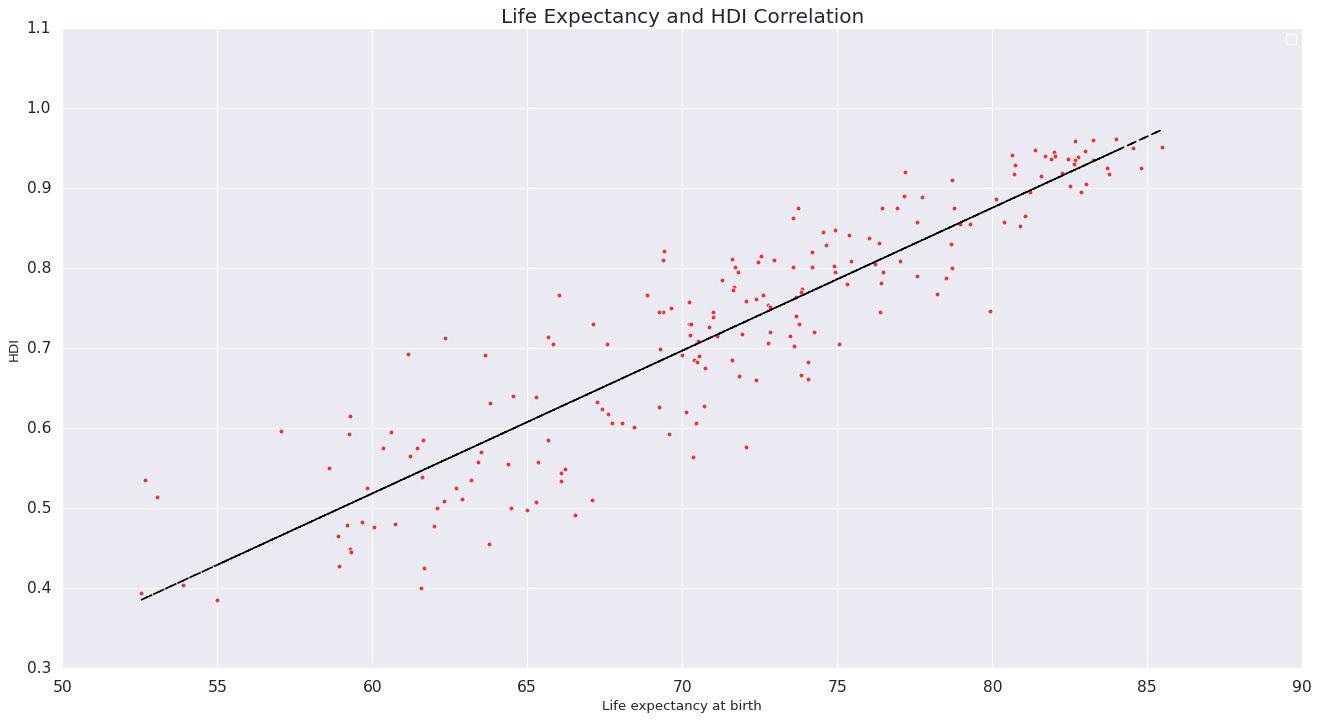

In [75]:
hd.plot(kind="scatter", x="Life expectancy at birth", y="HDI", color="red",alpha=0.8)
z = np.polyfit(hd["Life expectancy at birth"], hd["HDI"], 1)
p = np.poly1d(z)
plt.plot(hd["Life expectancy at birth"], p(hd["Life expectancy at birth"]), "k--")
plt.legend(loc="best")
plt.xlabel("Life expectancy at birth")
plt.ylabel("HDI")
plt.title("Life Expectancy and HDI Correlation")
plt.show()

In [78]:
from scipy.optimize import curve_fit

<Axes: xlabel='Gross national income (GNI) per capita', ylabel='HDI'>

Text(0.5, 0, 'Gross national income (GNI) per capita')

Text(0, 0.5, 'HDI')

Text(0.5, 1.0, 'Income and HDI Correlation')

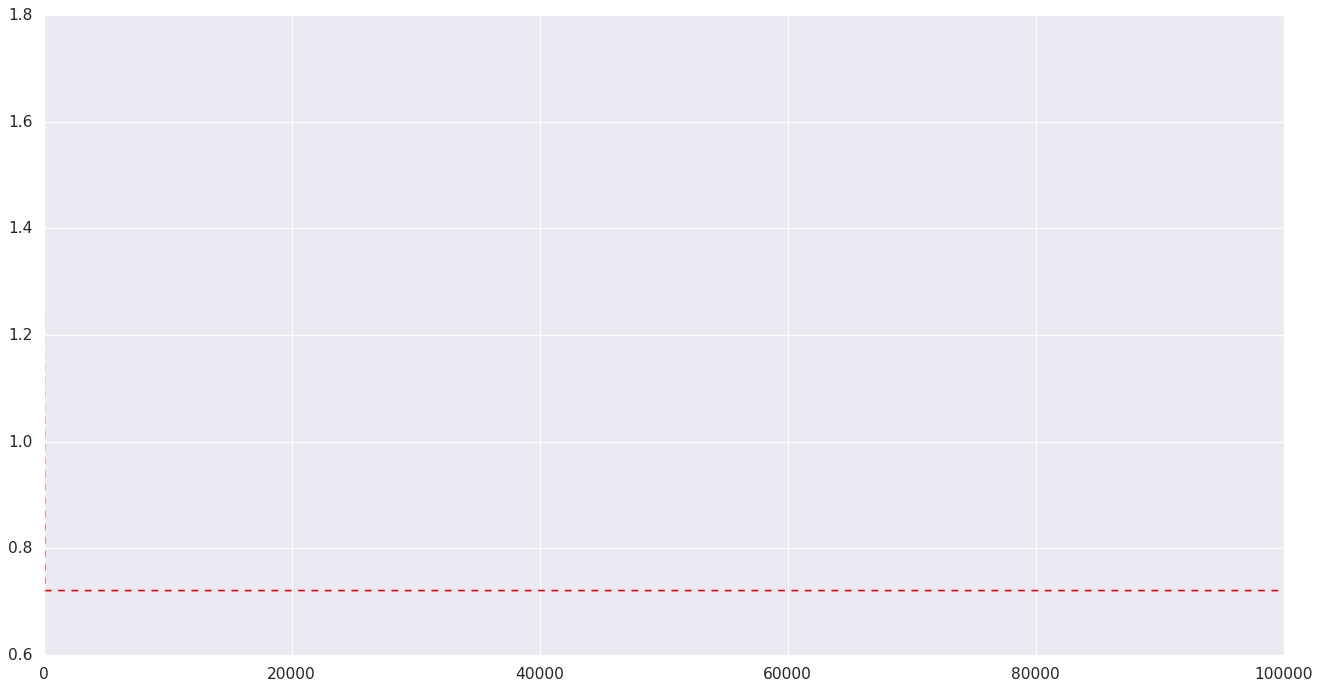

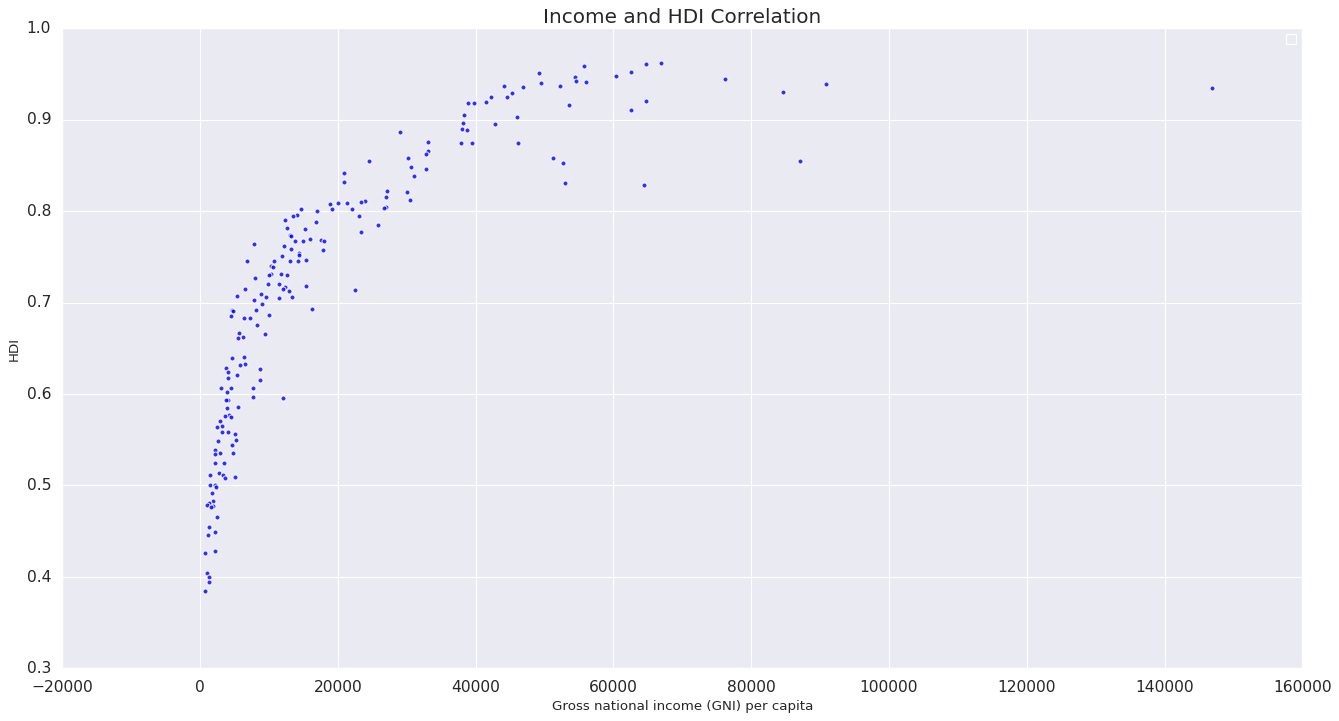

In [80]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c
    popt, pcov = curve_fit(func, hd["Gross national income (GNI) per capita"], hd["HDI"])
fitted_curve = lambda x: func(x, *popt)
x = np.linspace(0, 100000, 1000)
plt.plot(x, fitted_curve(x), "r--")
hd.plot(kind="scatter", x="Gross national income (GNI) per capita", y="HDI", color="blue",alpha=0.8)
plt.legend(loc="best")
plt.xlabel("Gross national income (GNI) per capita")
plt.ylabel("HDI")
plt.title("Income and HDI Correlation")
plt.show()

<Axes: xlabel='Mean years of schooling', ylabel='HDI'>

Text(0.5, 0, 'Mean years of schooling')

Text(0, 0.5, 'HDI')

Text(0.5, 1.0, 'Education and HDI Correlation')

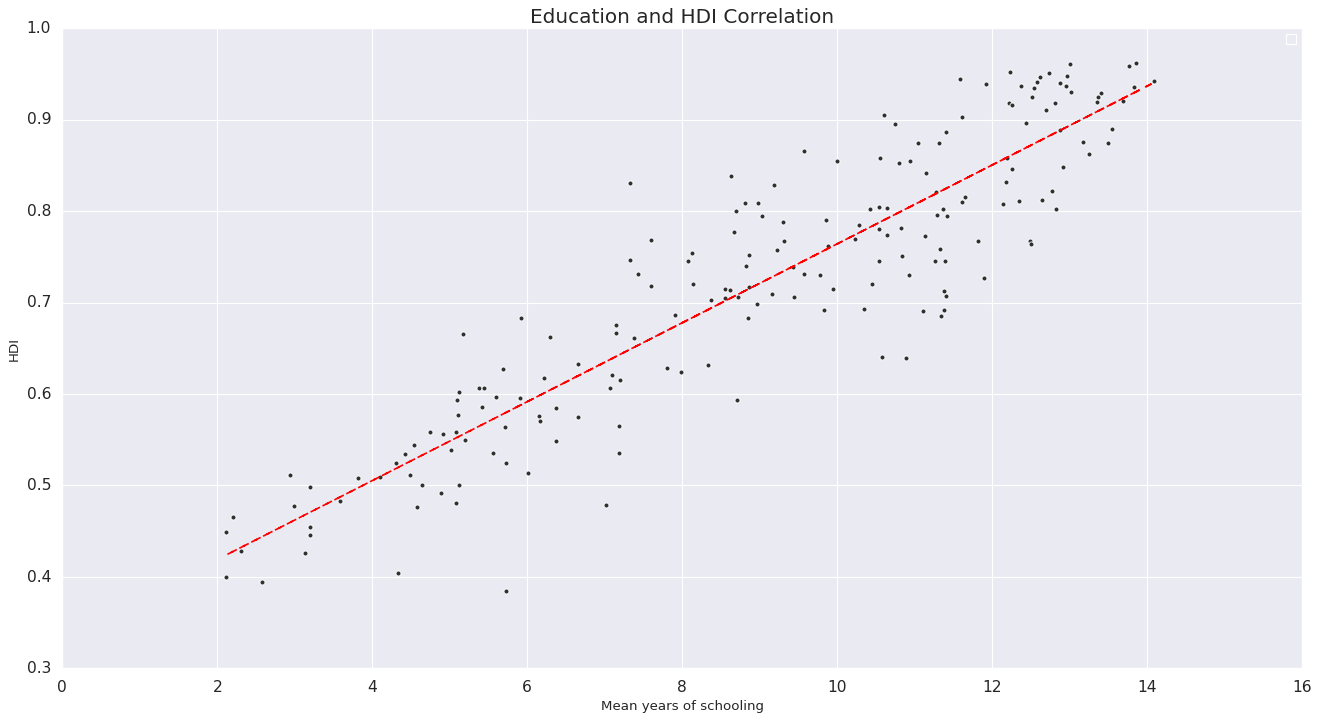

In [81]:
hd.plot(kind="scatter", x="Mean years of schooling", y="HDI", color="black",alpha=0.8)
z = np.polyfit(hd["Mean years of schooling"], hd["HDI"], 1)
p = np.poly1d(z)
plt.plot(hd["Mean years of schooling"], p(hd["Mean years of schooling"]), "r--")
plt.legend(loc="best")
plt.xlabel("Mean years of schooling")
plt.ylabel("HDI")
plt.title("Education and HDI Correlation")
plt.show()

<Axes: xlabel='Gross national income (GNI) per capita', ylabel='Life expectancy at birth'>

Text(0.5, 0, 'Gross national income (GNI) per capita')

Text(0, 0.5, 'Life expectancy at birth')

Text(0.5, 1.0, 'Income and Life Expectancy')

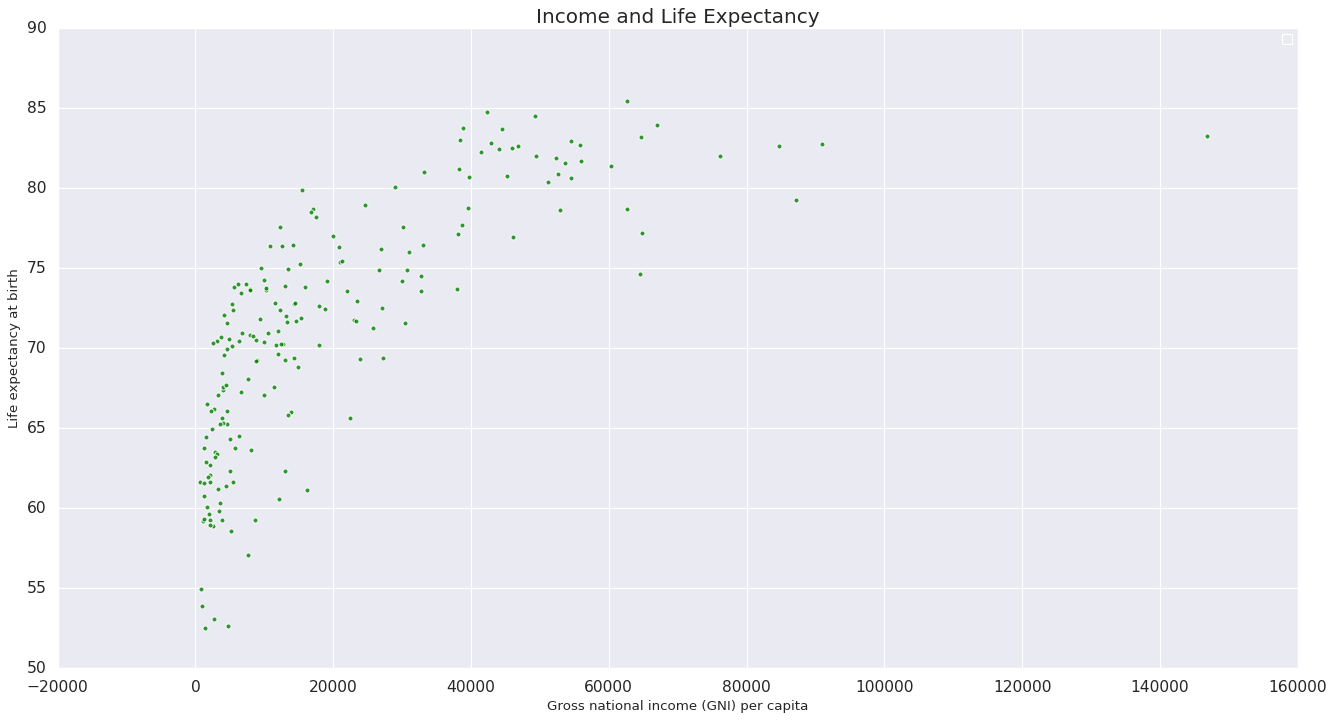

In [84]:
hd.plot(kind="scatter", x="Gross national income (GNI) per capita", y="Life expectancy at birth", color="green",alpha=0.8)
plt.legend(loc="best")
plt.xlabel("Gross national income (GNI) per capita")
plt.ylabel("Life expectancy at birth")
plt.title("Income and Life Expectancy")
plt.show()

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.offline as py
py.init_notebook_mode(connected=True)
import seaborn as sns
from scipy.stats.mstats import gmean
from scipy.stats.stats import pearsonr

%matplotlib inline

sns.set(rc={"figure.figsize": (20,10), "axes.titlesize" : 18, "axes.labelsize" : 12, 
            "xtick.labelsize" : 14, "ytick.labelsize" : 14 }, 
        palette=sns.color_palette("OrRd_d", 20))

import warnings
warnings.filterwarnings('ignore')


In [49]:
hd.columns

Index(['HDI Rank', 'Country', 'Human Development Index (HDI)',
       'Life expectancy at birth', 'Expected years of schooling',
       'Mean years of schooling', 'Gross national income (GNI) per capita'],
      dtype='object')

In [50]:
hd = hd.rename(columns={'Country ': 'Country'})

In [51]:
hd = hd.rename(columns={'Human Development Index (HDI) ': 'Human Development Index (HDI)'})

In [54]:
colorscale = [[0.0, 'rgb(230, 240, 255)'], [0.2, 'rgb(179, 209, 255)'], [0.4, 'rgb(102, 163, 255)'],\
              [0.6, 'rgb(26, 117, 255)'], [0.8, 'rgb(0, 71, 179)'], [1.0, 'rgb(0, 31, 77)']]
data = [dict(
        type='choropleth',
        locations=hd.Country,
        locationmode='country names',
        z=hd['Human Development Index (HDI)'],
        text=hd.Country,
        colorscale = colorscale,
        colorbar=dict(autotick=False, tickprefix='', title='Findex'),
)]
layout = dict(
            title = 'Human Development Index',
            geo = dict(
            showframe = False, 
            showcoastlines = True, 
            projection = dict(type = 'Mercator')),
            margin = dict(t=30, b=30, l=10, r=10))
fig = dict(data=data, layout=layout)
py.iplot(fig, validate=False)